# Exploratoty Data Analysis of the online retail store by Coursera
https://www.coursera.org/learn/perform-exploratory-data-analysis-on-retail-data-with-python/supplement/XqZpp/option-b-working-off-platform

##### Made by Nikita Gordonov

In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt
from scipy.interpolate import interp1d
import plotly.express as px

## Loading DB and deleting duplicate rows

In [62]:
df = pd.read_excel(r"C:\Users\Nikit\Downloads\CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail\Online Retail.xlsx")
df = df.drop_duplicates(ignore_index = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Spotting some abnormal values

<AxesSubplot:xlabel='Quantity'>

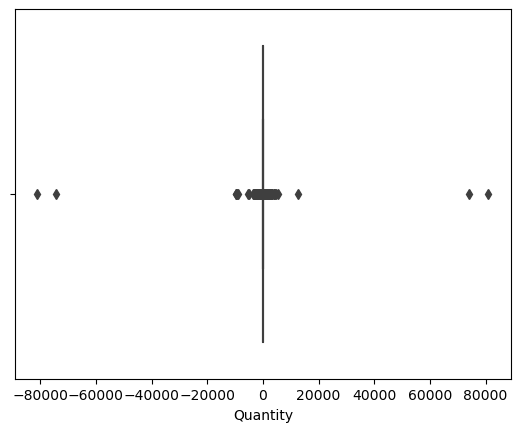

In [63]:
sns.boxplot(x=df['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

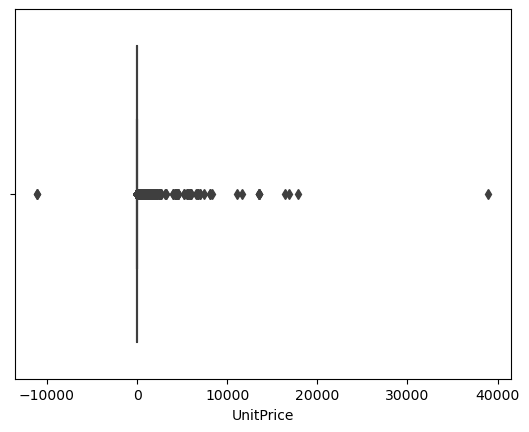

In [64]:
sns.boxplot(x=df['UnitPrice'])

In [65]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice' ] > 0)].reset_index(drop=True)
df['Rev'] = df.loc[:, 'UnitPrice']*df.loc[:, 'Quantity']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      524878 non-null  object        
 8   Rev          524878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.0+ MB


## Descriptive statistics

In [66]:
df.describe()

,Quantity,UnitPrice,CustomerID,Rev
count,524878.000000,524878.000000,392692.000000,524878.000000
mean,10.616600,3.922573,15287.843865,20.275399
std,156.280031,36.093028,1713.539549,271.693566
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13955.000000,3.900000
50%,4.000000,2.080000,15150.000000,9.920000
75%,11.000000,4.130000,16791.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [67]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
Rev                 0
dtype: int64

# Analyzing how date and time affects revenue

### Deleting 0.5% of revenue outliers (optional)

In [68]:
df = df[(df['Rev'] >= df['Rev'].quantile(0.0025)) & (df['Rev'] <= df['Rev'].quantile(0.9975))].reset_index(drop=True)

### Revenue analysis

In [69]:
df['InvoiceDateDay'] = pd.to_datetime(df['InvoiceDate'].apply(lambda x: x.date()))
df["InvoiceDateMonth"] = pd.to_datetime(df['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%Y/%m')))
df["InvoiceDateWeekDay"] = df['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%A'))
df["InvoiceDateTime"] = df['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%H:%M'))

In [70]:
rev_per_day = df.groupby(by='InvoiceDateDay', as_index=False).agg({'Rev': "sum"})
rev_per_month = df.groupby(by='InvoiceDateMonth', as_index=False).agg({'Rev': "sum"})
rev_per_weekday = df.groupby(by='InvoiceDateWeekDay', as_index=False).agg({'Rev': "sum"}).sort_values(by='Rev', ascending=False)
rev_per_time = df.groupby(by='InvoiceDateTime', as_index=False).agg({'Rev': "sum"})

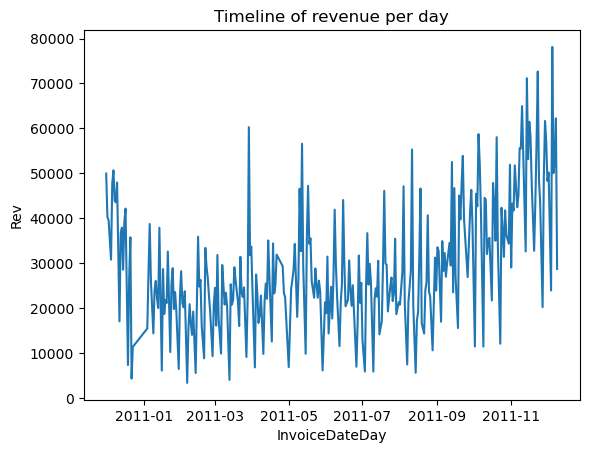

In [81]:
ax = sns.lineplot(data = rev_per_day, x = 'InvoiceDateDay', y = 'Rev')
ax.set_title("Timeline of revenue per day");

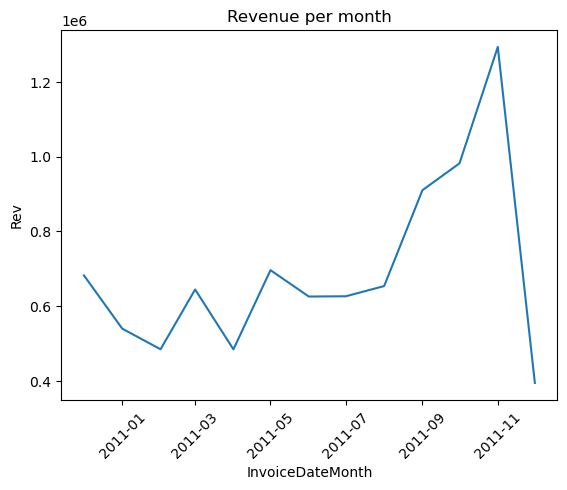

In [72]:
ax = sns.lineplot(data = rev_per_month, x = 'InvoiceDateMonth', y = 'Rev')
ax.set_title("Revenue per month")
plt.xticks(rotation=45);

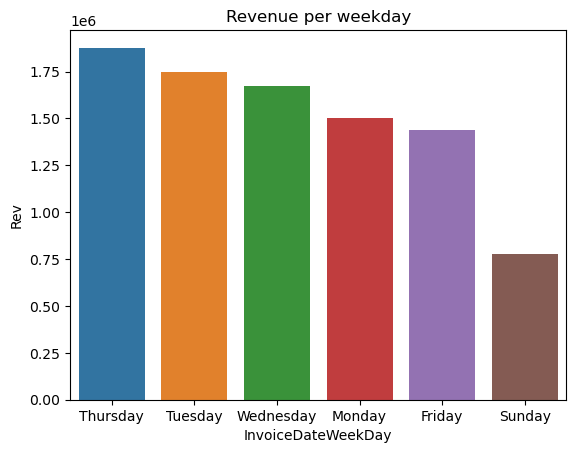

In [73]:
ax = sns.barplot(data = rev_per_weekday, x = 'InvoiceDateWeekDay', y = 'Rev')
ax.set_title("Revenue per weekday");

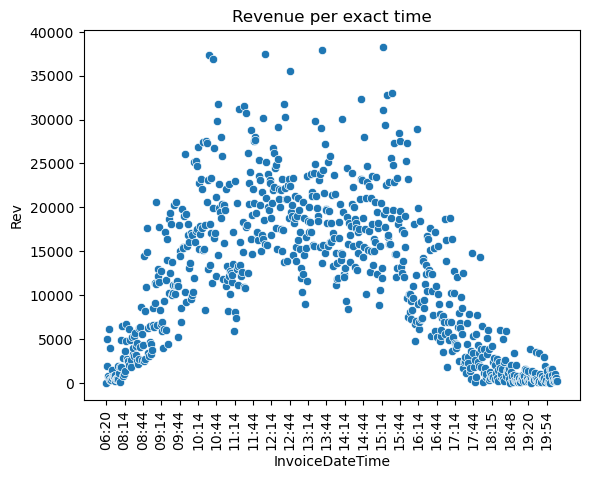

In [74]:
ax = sns.scatterplot(data = rev_per_time, x = 'InvoiceDateTime', y = 'Rev')
ax.set_title("Revenue per exact time")
new_ticks = rev_per_time['InvoiceDateTime'].tolist()
plt.xticks(range(0, len(new_ticks), 30), new_ticks[::30], rotation = 90);

## The most lucrative goods

In [75]:
rev_per_category = df.groupby(by = 'Description', as_index=False).agg({"Rev":"sum"})
rev_per_category.sort_values(by = "Rev", ascending=False).head(10).reset_index(drop=True)

,Description,Rev
0,REGENCY CAKESTAND 3 TIER,129968.87
1,DOTCOM POSTAGE,101678.98
2,JUMBO BAG RED RETROSPOT,77867.06
3,PARTY BUNTING,77449.31
4,WHITE HANGING HEART T-LIGHT HOLDER,76313.00
5,POSTAGE,68185.19
6,ASSORTED COLOUR BIRD ORNAMENT,51144.02
7,PAPER CHAIN KIT 50'S CHRISTMAS,47061.76
8,RABBIT NIGHT LIGHT,40007.40
9,CHILLI LIGHTS,39997.60


## The most popular goods

In [86]:
category = df.groupby(by = 'Description', as_index=False).agg({"Quantity":"sum"})
category.sort_values(by = "Quantity", ascending=False).head(10).reset_index(drop=True)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,44678
1,JUMBO BAG RED RETROSPOT,39390
2,PACK OF 72 RETROSPOT CAKE CASES,32556
3,ASSORTED COLOUR BIRD ORNAMENT,30994
4,WHITE HANGING HEART T-LIGHT HOLDER,27040
5,PACK OF 12 LONDON TISSUES,26102
6,POPCORN HOLDER,23507
7,MINI PAINT SET VINTAGE,23223
8,BROCADE RING PURSE,23015
9,VICTORIAN GLASS HANGING T-LIGHT,22355


## Defining target countries

In [76]:
rev_per_country = df.groupby(by = 'Country', as_index=False).agg({"Rev":"sum"})
rev_per_country = rev_per_country.sort_values(by = "Rev", ascending=False).reset_index(drop=True)
rev_per_country["% of total rev"] = 100*rev_per_country['Rev']/df["Rev"].sum()
rev_per_country.head(10)

,Country,Rev,% of total rev
0,United Kingdom,7550704.72,83.722869
1,Netherlands,248500.56,2.755396
2,EIRE,244087.66,2.706465
3,Germany,223141.36,2.474211
4,France,194682.27,2.158654
5,Australia,109082.41,1.209515
6,Switzerland,57067.60,0.632771
7,Spain,53010.52,0.587785
8,Belgium,41196.34,0.456789
9,Norway,35465.44,0.393244


In [77]:
countries = pd.read_excel(r"C:\Users\Nikit\Downloads\time_series_covid19_confirmed_global.xls")
rev_per_country = rev_per_country.merge(countries, on = 'Country')

In [87]:
rev_list = list(rev_per_country['% of total rev'])
circle_radius = interp1d([0, max(rev_list)], [5, 18])(rev_list)
fig = px.density_mapbox(rev_per_country, lat='Lat', lon='Long', radius=circle_radius, zoom=0,
                        mapbox_style='open-street-map',
                        hover_name='Country', hover_data=['% of total rev'],
                        title='The contribution of countries to our revenue', width=760, height=550)
fig

## The most active buyers 

In [79]:
most_loyal_buyers = df.groupby(by = 'CustomerID', as_index=False).agg({"Quantity":"sum"})
most_loyal_buyers = most_loyal_buyers.sort_values(by = "Quantity", ascending=False).head(10).reset_index(drop=True)
most_loyal_buyers["% of total quantity"] = 100*most_loyal_buyers['Quantity']/df["Quantity"].sum()
most_loyal_buyers

,CustomerID,Quantity,% of total quantity
0,14646.0,176085,3.532390
1,14911.0,79262,1.590052
2,12415.0,67458,1.353255
3,17511.0,63699,1.277847
4,13694.0,62282,1.249421
5,14298.0,58087,1.165266
6,14156.0,51616,1.035453
7,16684.0,42757,0.857736
8,15311.0,38137,0.765055
9,16422.0,33704,0.676126


## The most lucrative buyers

In [82]:
buyers_stats = df.groupby(by = 'CustomerID', as_index=False).agg({"Quantity":"sum", "Rev": "sum"})
buyers_stats["AOV"] = buyers_stats['Rev']/buyers_stats['Quantity']
buyers_stats = buyers_stats.sort_values(by = "AOV", ascending=False).head(10).reset_index(drop=True)
buyers_stats

,CustomerID,Quantity,Rev,AOV
0,15802.0,1,451.42,451.420000
1,13452.0,2,590.00,295.000000
2,15510.0,2,250.00,125.000000
3,18233.0,4,440.00,110.000000
4,15524.0,4,440.00,110.000000
5,16692.0,2,158.50,79.250000
6,17500.0,11,628.00,57.090909
7,14816.0,5,271.85,54.370000
8,14185.0,6,197.65,32.941667
9,16429.0,9,284.55,31.616667


# THE END